In [0]:
import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plot
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix,roc_curve, auc, recall_score, accuracy_score, precision_score,plot_precision_recall_curve,precision_recall_curve,plot_roc_curve
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import re
from typing import Any, Dict, List, Optional
import math
import pandas as pd
from pyspark.sql import DataFrame, SparkSession
from pyspark.sql import functions as func
from pyspark.sql import types
from pyspark.sql.window import Window
import matplotlib.pyplot as plt
from math import floor, ceil

%matplotlib inline


def rename_columns(data_frame: DataFrame, column_map: Dict[str, str]) -> DataFrame:
    for old_name, new_name in column_map.items():
        data_frame = data_frame.withColumnRenamed(old_name, new_name)
    return data_frame


def set_columns_dtype(
    data_frame: DataFrame, column_dtype_map: Dict[str, Any]
) -> DataFrame:
    for column, dtype in column_dtype_map.items():
        data_frame = data_frame.withColumn(column, data_frame[column].cast(dtype))
    return data_frame

  

In [0]:
df_wits = spark.sql("SELECT * FROM 03_corva.corva_drilling_wits_silver")
data_types_dict = {'asset_id': types.IntegerType(),
                   'RecordDateTime': types.TimestampType(),
                    'rotary_rpm': types.DoubleType(),
                    'rotary_torque': types.DoubleType(),
                    'weight_on_bit': types.DoubleType(),
                    'true_vertical_depth': types.DoubleType(),
                    'gamma_ray':types.DoubleType(),
                    'state':types.StringType(),
                    'WellName': types.StringType(),
                    'diff_press': types.DoubleType(),
                    'rop': types.DoubleType(),
                    'bit_depth': types.DoubleType()}
df_wits = set_columns_dtype(df_wits, data_types_dict)
df_wits = df_wits.select(list(data_types_dict.keys()))

In [0]:
df_wits.show(5)

+--------+-------------------+----------+-------------+-------------+-------------------+---------+-----------------+--------+----------+---+---------+
asset_id| RecordDateTime|rotary_rpm|rotary_torque|weight_on_bit|true_vertical_depth|gamma_ray| state|WellName|diff_press|rop|bit_depth|
+--------+-------------------+----------+-------------+-------------+-------------------+---------+-----------------+--------+----------+---+---------+
72647746|2021-06-11 07:20:45| 83.443| 6.569| 21.545| 12867.73| null| Reaming Up| Opal-1A| 0.0|0.0| 10512.3|
72647746|2021-06-11 07:20:46| 83.771| 4.792| 19.092| 12867.73| null| Reaming Up| Opal-1A| 0.0|0.0| 10511.7|
72647746|2021-06-11 07:20:47| 82.951| 3.392| 22.363| 12867.73| null| Reaming Up| Opal-1A| 0.0|0.0| 10511.5|
72647746|2021-06-11 07:20:48| 82.951| 3.392| 22.363| 12867.73| null|Rotary Off Bottom| Opal-1A| 0.0|0.0| 10511.5|
72647746|2021-06-11 07:20:49| 81.312| 3.856| 21.684| 12867.73| null| Reaming Down| Opal-1A| 0.0|0.0| 10512.3|
+--------+-------------------+----------+-------------+-------------+-------------------+---------+-----------------+--------+----------+---+---------+
only showing top 5 rows

In [0]:
df_BdC_29 = df_wits.where("WellName='BdC-29(h)'").toPandas()
df_BdC_45 = df_wits.where("WellName='BdC-45(h) (Aislacion)'").toPandas()

In [0]:
df_BdC_29= df_BdC_29[df_BdC_29['asset_id'] == 27156361]

In [0]:
df_BdC_29.sort_values(by='RecordDateTime', inplace=True)

/local_disk0/tmp/1627317548968-0/PythonShell.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 from __future__ import absolute_import

In [0]:
plt.style.use('seaborn')

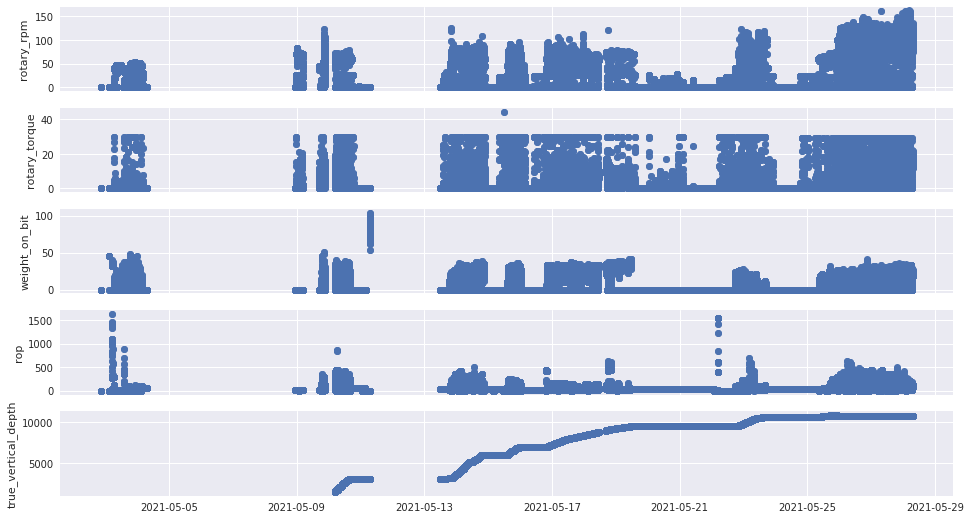

In [0]:
columns = ['rotary_rpm', 'rotary_torque', 'weight_on_bit', 'rop', 'true_vertical_depth']

fig, axes = plt.subplots(len(columns), 1, sharex=True, figsize=(16, 9))
axes = axes.ravel()

for col, ax in zip(columns, axes):
  ax.plot(df_BdC_29['RecordDateTime'], df_BdC_29[col], 'o')
  ax.set_ylabel(col)